In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from generate import generate

In [2]:
record = pd.read_csv('exp_data.csv')

In [3]:
# for mouse in ['AKED01', 'AKED02', 'AKED04', 'AKED05', 'AKED06']:
#     mouse_data = record[record['mouse_name'] == mouse]
#
#     session_num = mouse_data['date'].nunique()
#     fig, axes = plt.subplots(session_num, 1, figsize=(20, 60))
#
#     for idx, date in enumerate(mouse_data['date'].unique()):
#         session_data = mouse_data[mouse_data['date'] == date]
#         session_data = session_data[session_data['trialreward'].notnull()].reset_index()
#         choice_prob = np.convolve(session_data['trialresponseside'], np.ones(6)/6, 'same')
#         # generate_prob = np.convolve(generate(session_data['zeta'][0], session_data['alpha'][0], session_data['beta'][0], session_data['b'][0], session_data['trialresponseside'], session_data['trialreward'], session_data['leftP'], session_data['rightP']), np.ones(6)/6, 'same')
#         generate_prob = generate(session_data['zeta'][0], session_data['alpha'][0], session_data['beta'][0], session_data['b'][0], session_data['trialresponseside'], session_data['trialreward'], session_data['leftP'], session_data['rightP'])
#         reward = 2 * session_data['rightP'] / (session_data['rightP'] + session_data['leftP']) - 1
#         sns.lineplot(x=session_data['trial_index'], y=choice_prob, ax=axes[idx], legend='auto', label='mouse choices')
#         sns.lineplot(x=session_data['trial_index'], y=reward, ax=axes[idx], legend='auto', label='reward')
#         sns.lineplot(x=session_data['trial_index'], y=generate_prob, ax=axes[idx], legend='auto', label='model choices')
#         axes[idx].set_xlabel('trial')
#         axes[idx].set_ylabel('reward_prob')
#         axes[idx].set_yticks([-1,0, 1], labels=['left',0, 'right'])
#         axes[idx].set_title('mouse %s on date %s' % (mouse, date))
#
#     fig.savefig(mouse + '.png')

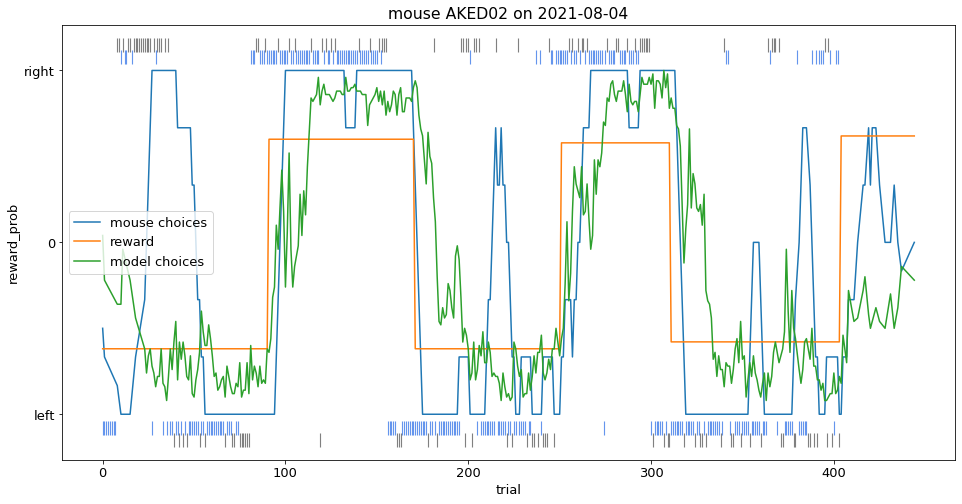

In [18]:
matplotlib.rcParams.update({'font.size': 13})
matplotlib.rcParams.update({'legend.loc': 'best'})
fig, axes = plt.subplots(1, 1, figsize=(16, 8))

date = '2021-08-04'
mouse = 'AKED02'

mouse_data = record[record['mouse_name'] == mouse]

session_data = mouse_data[mouse_data['date'] == date]
session_data = session_data[session_data['trialreward'].notnull()].reset_index()

left_noreward = []
left_rewarded = []
right_noreward = []
right_rewarded = []

for i in range(len(session_data)):
    if session_data['trialresponseside'][i] == 1:
        if session_data['trialreward'][i] == 1:
            right_rewarded.append(i)
        else:
            right_noreward.append(i)
    else:
        if session_data['trialreward'][i] == 1:
            left_rewarded.append(i)
        else:
            left_noreward.append(i)

mk_size=200

sns.scatterplot(x=right_noreward, y=1.15, marker='|', ax=axes, color='gray', s=mk_size)
sns.scatterplot(x=right_rewarded, y=1.08, marker='|', ax=axes, color='cornflowerblue', s=mk_size)
sns.scatterplot(x=left_rewarded, y=-1.08, marker='|', ax=axes, color='cornflowerblue', s=mk_size)
sns.scatterplot(x=left_noreward, y=-1.15, marker='|', ax=axes, color='gray', s=mk_size)

choice_prob = np.convolve(session_data['trialresponseside'], np.ones(6)/6, 'same')
# generate_prob = np.convolve(generate(session_data['zeta'][0], session_data['alpha'][0], session_data['beta'][0], session_data['b'][0], session_data['trialresponseside'], session_data['trialreward'], session_data['leftP'], session_data['rightP']), np.ones(6)/6, 'same')
generate_prob = generate(session_data['zeta'][0], session_data['alpha'][0], session_data['beta'][0], session_data['b'][0], session_data['trialresponseside'], session_data['trialreward'], session_data['leftP'], session_data['rightP'])
reward = 2 * session_data['rightP'] / (session_data['rightP'] + session_data['leftP']) - 1
sns.lineplot(x=session_data['trial_index'], y=choice_prob, ax=axes, legend='auto', label='mouse choices')
sns.lineplot(x=session_data['trial_index'], y=reward, ax=axes, legend='auto', label='reward')
sns.lineplot(x=session_data['trial_index'], y=generate_prob, ax=axes, legend='auto', label='model choices')
axes.set_xlabel('trial')
axes.set_ylabel('reward_prob')
axes.set_yticks([-1,0, 1], labels=['left',0, 'right'])
axes.set_title('mouse %s on %s' % (mouse, date))

fig.savefig(mouse + date + '.png')